B-Spline

https://b01-kr-naver-vod.pstatic.net/mooc/c/read/v2/VOD_ALPHA/next-mooc_2024_02_22_16/949af3bb-d16c-11ee-a937-a0369ffda0e4.mp4?_lsu_sa_=61e5e8f23160654640d285c86385febf2eb83d68180f4f3f3e57c1ca573934d5272c0ae76985e80c803e3dd2563ebbe0c3a0b46b92c85e562b28479eb94900837351c92f907ab1101b6b9a79c031c258

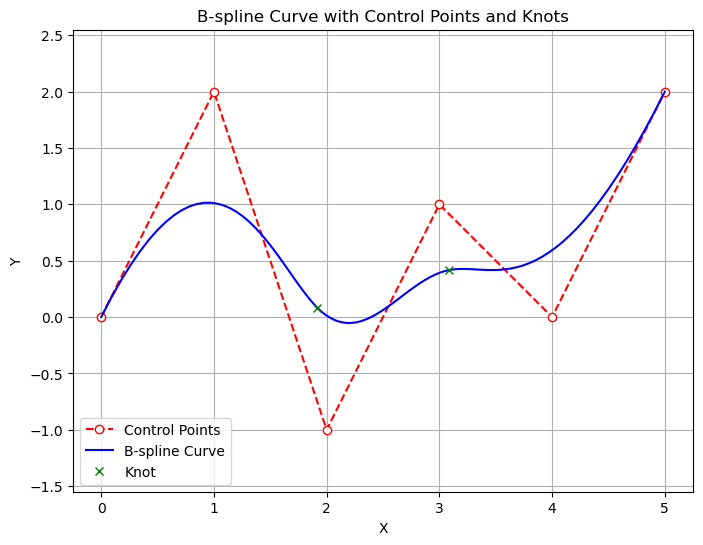

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import BSpline

# B-spline 시각적 예제 생성

# 제어점 설정
control_points = np.array([[0, 0], [1, 2], [2, -1], [3, 1], [4, 0], [5, 2]])
x = control_points[:, 0]
y = control_points[:, 1]

# 노드 벡터 설정 (Uniform Knot Vector)
degree = 3  # 곡선의 차수
num_control_points = len(control_points)
num_knots = num_control_points + degree + 1
knots = np.linspace(0, 1, num_knots - 2 * degree)  # 내부 노드
knots = np.concatenate(([0] * degree, knots, [1] * degree))  # 시작과 끝 부분을 중복

# B-spline 곡선 생성
spl = BSpline(knots, control_points, degree)

# 곡선을 위한 매개변수 값 설정
t = np.linspace(0, 1, 100)

# 곡선 좌표 계산
curve = spl(t)

# 시각화
plt.figure(figsize=(8, 6))

# 제어점 표시
plt.plot(x, y, 'o--', label='Control Points', color='red', markerfacecolor='white')

# B-spline 곡선 표시
plt.plot(curve[:, 0], curve[:, 1], label='B-spline Curve', color='blue')

# 노드 위치 표시
for knot in knots:
    if 0 < knot < 1:  # 내부 노드만 표시
        point = spl(knot)
        plt.plot(point[0], point[1], 'x', color='green', label='Knot' if 'Knot' not in plt.gca().get_legend_handles_labels()[1] else "")

# 레이블과 범례 설정
plt.title("B-spline Curve with Control Points and Knots")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.grid()
plt.axis("equal")
plt.show()


y : (100, 6)
base_curve : (100, 6)
spline_curve : (100,)


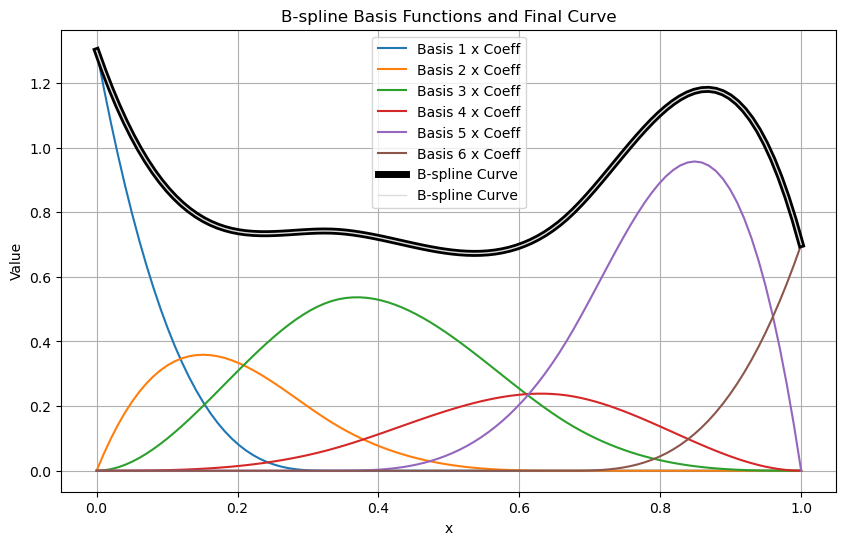

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from patsy import dmatrix

# B-spline Basis Functions 예제 (degree=3)
x = np.linspace(0., 1., 100)
# df --> degrees of freedom --> 자유도 (기저 함수의 개수)
# degree --> 곡선 방정식의 차항
y = dmatrix("bs(x, df=6, degree=3, include_intercept=True) - 1", {"x": x})


print(f"y : {y.shape}") # (100,6) == (x, df)
# Define coefficients
b = np.array([1.3, 0.6, 0.9, 0.4, 1.6, 0.7]) # ** parameter **

# 각 구간별 단순 다항식 곡선을 구하기 위한 기여 계산
basis_curves = y * b # (100, 6) * (6, ) = (100, 6)
print(f"base_curve : {basis_curves.shape}")

# 최종 B-spline 곡선 계산 (기저 함수의 합)
spline_curve = np.dot(y, b) # (100, 6) @ (6, ) = (100, ) = sum(basis_curves)
spline_curves = np.sum(basis_curves, axis=1) 
print(f"spline_curve : {spline_curve.shape}")

# 시각화
plt.figure(figsize=(10, 6))

# 개별 기저 함수와 곡선의 기여(컬러로 표시된 곡선)
for i, basis_curve in enumerate(basis_curves.T):
    plt.plot(x, basis_curve, label=f"Basis {i+1} x Coeff")

# 최종 B-spline 곡선 (검은색 두꺼운 곡선) 완벽하게 겹친다
plt.plot(x, spline_curve, color='k', linewidth=5, label="B-spline Curve")
plt.plot(x, spline_curves, color='#DDDDDD', linewidth=1, label="B-spline Curve")

# 레이블 및 범례
plt.title("B-spline Basis Functions and Final Curve")
plt.xlabel("x")
plt.ylabel("Value")
plt.legend()
plt.grid()
plt.show()


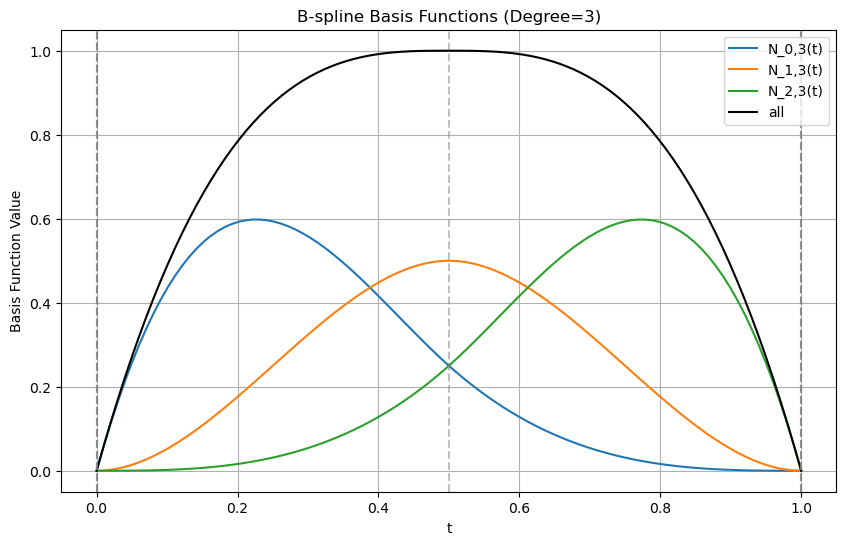

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def basis_function_recursive(t, i, p, knots):
    """Recursive definition of B-spline basis function."""
    if p == 0:
        # 0-th degree basis function
        return 1.0 if knots[i] <= t < knots[i + 1] else 0.0
    else:
        # Recursive calculation
        left_num = t - knots[i]
        left_den = knots[i + p] - knots[i]
        left_term = (left_num / left_den * basis_function_recursive(t, i, p - 1, knots)) if left_den != 0 else 0

        right_num = knots[i + p + 1] - t
        right_den = knots[i + p + 1] - knots[i + 1]
        right_term = (right_num / right_den * basis_function_recursive(t, i + 1, p - 1, knots)) if right_den != 0 else 0

        return left_term + right_term


def plot_recursive_basis_functions(knots, degree, resolution=100):
    """Plot B-spline basis functions up to a given degree recursively."""
    t_values = np.linspace(knots[0], knots[-1], resolution)
    plt.figure(figsize=(10, 6))

    sum_y = []
    # Plot basis functions for each i
    for i in range(len(knots) - degree - 1):
        y_values = [basis_function_recursive(t, i, degree, knots) for t in t_values]
        plt.plot(t_values, y_values, label=f'N_{i},{degree}(t)')
        sum_y.append(y_values)

    sum_y = np.array(sum_y)
    sum_y = np.sum(sum_y, axis=0)
    plt.plot(t_values, sum_y, label=f'all', color='k')
    # Plot knots as vertical lines
    for knot in knots:
        plt.axvline(knot, color='gray', linestyle='--', alpha=0.5)

    # Customize plot
    plt.title(f"B-spline Basis Functions (Degree={degree})")
    plt.xlabel("t")
    plt.ylabel("Basis Function Value")
    plt.legend()
    plt.grid()
    plt.show()


# Define knots and degree
knots = [0, 0, 0, 0.5, 1, 1, 1]  # Open uniform knot vector ** parameter **
# knots = [0, 0, 0, 0, 0.25, 0.5, 0.75, 1, 1, 1, 1]  # Open uniform knot vector
degree = 3  # Cubic B-spline ** parameter **

# Plot recursive B-spline basis functions
plot_recursive_basis_functions(knots, degree)


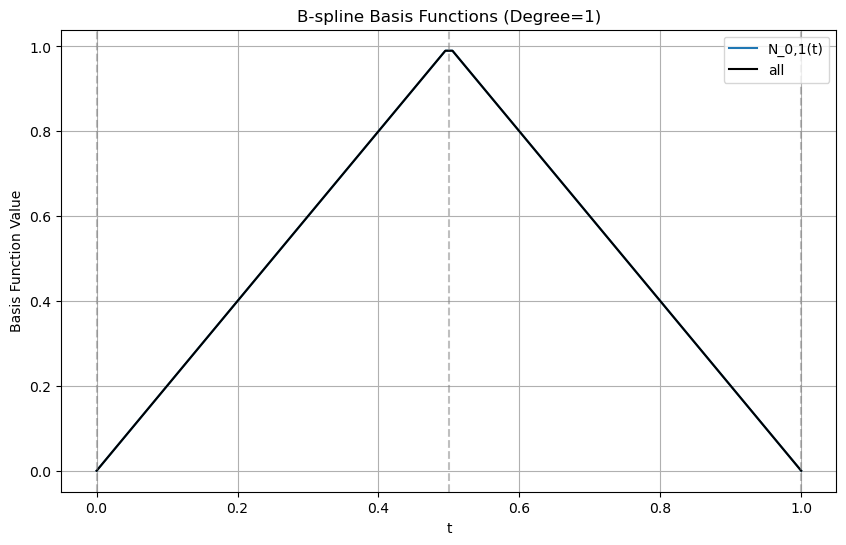

In [10]:
# Define knots and degree
knots = [0, 0.5, 1]  # Open uniform knot vector ** parameter **
# knots = [0, 0, 0, 0, 0.25, 0.5, 0.75, 1, 1, 1, 1]  # Open uniform knot vector
degree = 1  # Cubic B-spline ** parameter **

# Plot recursive B-spline basis functions
plot_recursive_basis_functions(knots, degree)